# Introduction
Implementation of linear regression algorithm from scratch and comparison of its performance with Scikit-learn library.
## Importing the required libraries

In [31]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pf_orig = pd.read_csv('/kaggle/input/startup-logistic-regression/50_Startups.csv')
pf_orig.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
pf_num = pf_orig.copy().drop('State', axis = 1)
states_map, i = {}, 0
for key in pf_orig.State.unique():
    states_map[key] = i
    i+= 1
pf_num['State']= pf_orig.State.map(lambda x: states_map[x])
pf_num.head()

,R&D Spend,Administration,Marketing Spend,Profit,State
0,165349.20,136897.80,471784.10,192261.83,0
1,162597.70,151377.59,443898.53,191792.06,1
2,153441.51,101145.55,407934.54,191050.39,2
3,144372.41,118671.85,383199.62,182901.99,0
4,142107.34,91391.77,366168.42,166187.94,2


In [4]:
pstats = pf_num.describe()
pstats

,R&D Spend,Administration,Marketing Spend,Profit,State
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.980000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.820403
min,0.000000,51283.140000,0.000000,14681.400000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,1.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,2.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,2.000000


In [5]:
pf_norm = pf_num.copy()
for col in pf_num.keys():
    pf_norm[col] = (pf_num[col] - pstats.min()[col])/(pstats.max()[col]-pstats.min()[col])
pf_norm.head()

,R&D Spend,Administration,Marketing Spend,Profit,State
0,1.000000,0.749459,1.000000,1.000000,0.00
1,0.983359,0.828758,0.940893,0.997556,0.02
2,0.927985,0.553658,0.864664,0.993697,0.04
3,0.873136,0.649643,0.812235,0.951305,0.00
4,0.859438,0.500241,0.776136,0.864348,0.04


Inputs and outputs 

In [126]:
profit = pf_norm.Profit.array.reshape(50,1)
X = pf_norm.keys().tolist()
X.remove('Profit') 
Xinp = np.array(pf_norm[X])
X.insert(0,'bias')
#X.remove('Administration'), X.remove('State')
print('predictors X: ',X, 'output shape: ', profit.shape)
Xinp = np.hstack((np.ones((50,1)),Xinp))

predictors X:  ['bias', 'R&D Spend', 'Administration', 'Marketing Spend', 'State'] output shape:  (50, 1)


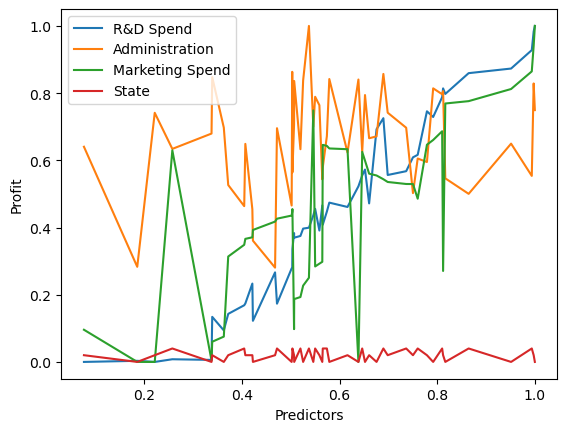

In [127]:
plt.plot(profit, Xinp[:,1], label='R&D Spend')
plt.plot(profit, Xinp[:,2], label='Administration')
plt.plot(profit, Xinp[:,3], label='Marketing Spend')
plt.plot(profit, Xinp[:,4], label='State')
plt.xlabel('Predictors'), plt.ylabel('Profit')
plt.legend()

In [130]:
theta = np.zeros((Xinp.shape[1],1)) #5x1
def loss_ftn(true,pred): #MSE
    return 0.5*np.mean((true-pred)**2)

iters, lr = 100, 0.0001
loss = np.zeros(iters)
for it in range(iters):
    y_pred = np.dot(Xinp,theta)
    loss[it] = loss_ftn(profit,y_pred)
    diff = (profit-y_pred)
    '''for i in range(len(theta)):
        if i==0:
            theta[i,] = theta[i,] - lr*np.mean(diff)
        else:
            theta[i,] = theta[i,] - lr*np.mean(diff*Xinp[:,i])'''
    theta = theta - lr*np.mean(diff*Xinp,axis=0).reshape(len(theta),1)
    print(it,' : ',loss[it])
    #break
    

0  :  0.19119746614393432
1  :  0.1912658407417068
2  :  0.19133424095917395
3  :  0.191402666805952
4  :  0.19147111829166097
5  :  0.19153959542592436
6  :  0.19160809821836938
7  :  0.19167662667862673
8  :  0.19174518081633082
9  :  0.19181376064111963
10  :  0.19188236616263482
11  :  0.19195099739052157
12  :  0.19201965433442875
13  :  0.19208833700400887
14  :  0.19215704540891798
15  :  0.1922257795588159
16  :  0.19229453946336583
17  :  0.19236332513223495
18  :  0.19243213657509373
19  :  0.1925009738016164
20  :  0.19256983682148096
21  :  0.1926387256443688
22  :  0.19270764027996504
23  :  0.19277658073795848
24  :  0.19284554702804166
25  :  0.19291453915991041
26  :  0.19298355714326454
27  :  0.1930526009878074
28  :  0.19312167070324596
29  :  0.19319076629929072
30  :  0.19325988778565606
31  :  0.19332903517205988
32  :  0.19339820846822367
33  :  0.19346740768387272
34  :  0.19353663282873576
35  :  0.19360588391254546
36  :  0.1936751609450378
37  :  0.1937444639

In [131]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression(fit_intercept = True).fit(Xinp, profit)
sk_predict = sk_model.predict(Xinp)

sk_error = loss_ftn(profit, sk_predict)
gd_er = loss_ftn(profit,np.dot(Xinp,theta))
print('Scikit : ',sk_error, sk_model.intercept_, sk_model.coef_)
print('GD from scratch : ',gd_er, theta.transpose())

Scikit :  0.0010611355863191796 [0.26009526] [[ 0.          0.69339925 -0.02563694  0.06633659  0.03082918]]
GD from scratch :  0.198163312625957 <PandasArray>
[
[-0.005880685900992997],
[-0.003179106578924618],
[-0.003970307137382028],
[-0.0030304635595848482],
[-0.00011690738077381398]
]
Shape: (5, 1), dtype: float64
